# Table of Contents <a id='back'></a>

* [OilyGiant](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=VqwilnTpNjII)
* [1. Initialization](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=f216a9d6)
* [2. Data Preparation](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=df6691a7)
    * [2.1 Memuat Semua Data dan Menampilkan Sample Data](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=RQMUi6I0ZLIp)
    * [2.2 Print the Information of Datasets](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=bfe21e52-6526-41a6-8e80-7ad55c356d8f&line=1&uniqifier=1)
    * [2.3 Menampilkan Statistik Deskriptif dari Data](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=Hez-TZEKaFIb)
* [3. EDA and Data Visualization](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=ck0zHdn6lNO2&line=5&uniqifier=1)
    * [3.1 Region 0](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=bmQM2sXZZFDN&line=1&uniqifier=1)
    * [3.2 Region 1](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=Til7usIYZI2r&line=1&uniqifier=1)
    * [3.3 Region 2](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=LpyIObMkZNJ-&line=1&uniqifier=1)
* [4. Split the Data](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=JNogScXo4HeA&line=2&uniqifier=1)
* [5. Create Model](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=xGCOQVD_hz5-)
    * [5.1 Linear Regression](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=levZlEbkh4l0)
* [6. Calculate the Profit](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=dxrQ4R3Wrrif)
    
* [Consclusions](https://colab.research.google.com/drive/1cITvek3ekCpfzXM8U975nBoTeSi95krp#scrollTo=ODjbHKLCbc7F&line=23&uniqifier=1)

# OilyGiant

We work for the OilyGiant mining company. Our task is to find the best place for a new well.

Steps to choose the location:

- Collecting the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

We have data on oil samples from three regions. Parameters of each oil well in the region are already known. We are going to build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the *Bootstrapping* technique.

**Goals:**
- Collect the oil well parameters each regions: oil quality and volume of reserves.
- Build a model for predicting the volume of reserves in the new wells.
- Pick the oil wells with the highest estimated values.
- Pick the region with the highest total profit for the selected oil wells.

## 1. Initialization

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor

## 2. Data Preparation

### 2.1. Memuat Semua Data dan Menampilkan Sample Data


In [2]:
# load datasets
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    try:
        df0 = pd.read_csv('/home/syaid/Downloads/Sprint9/geo_data_0.csv')
        df1 = pd.read_csv('/home/syaid/Downloads/Sprint9/geo_data_1.csv')
        df2 = pd.read_csv('/home/syaid/Downloads/Sprint9/geo_data_2.csv')

    except:
        df0 = pd.read_csv('/content/geo_data_0.csv')
        df1 = pd.read_csv('/content/geo_data_1.csv')
        df2 = pd.read_csv('/content/geo_data_2.csv')

In [3]:
# menampilkan sample data df0
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# menampilkan sample data df1
df1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
# menampilkan sample data df2
df2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


### 2.2. Print the Information of Datasets

In [6]:
# menampilkan informasi df0
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# menampilkan informasi df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# menampilkan informasi df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


- Ketiga dataset diatas memiliki jumlah kolom dan baris yang sama yaitu **5** kolom dan **100.000** baris.
- Tidak ada *missing value* ditemukan pada ketiga dataset tersebut.
- Tipe data data pada kolom-kolom sudah terdefinisi dengan benar, kolom `id` dedefinisikan sebagai **object** sedangkan kolom `f0`, `f1`, `f2`, dan `product` didefinisikan sebagai **float**.

### 2.3. Menampilkan Statistik Deskriptif dari Data

In [9]:
# menampilkan statistik deskriptif df0
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
# menampilkan statistik deskriptif df1
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
# menampilkan statistik deskriptif df2
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


## 3. EDA and Data Visualization

### 3.1. Region 0

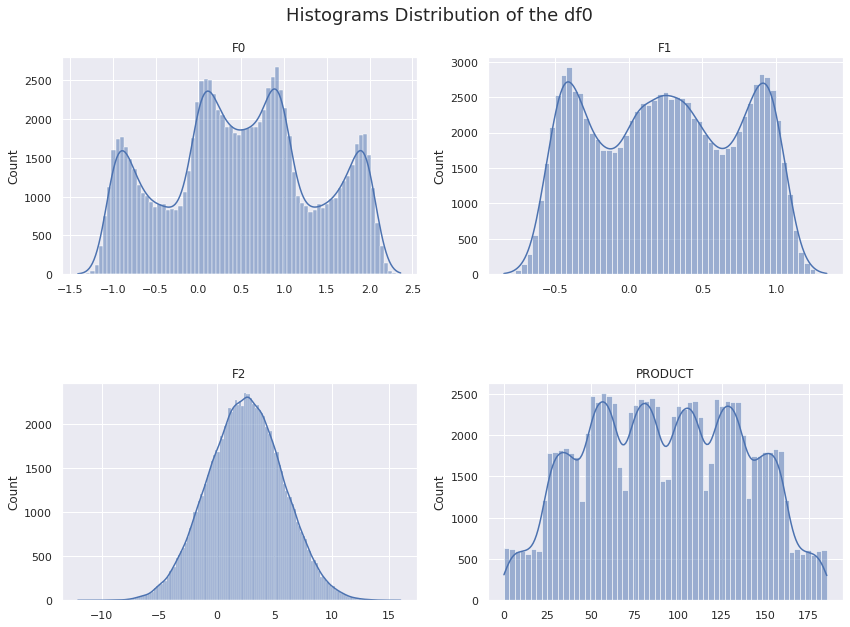

In [12]:
# menampilkan visualisasi df0
sns.set()

columns = ['f0', 'f1', 'f2', 'product']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df0', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df0[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Kolom `f0`, `f1`, dan `product` memiliki bentuk multimodal, artinya kolom-kolom tersebut memiliki 2 atau lebih *mode*.
- Kolom `f2` memiliki distribusi normal.

### 3.2. Region 1

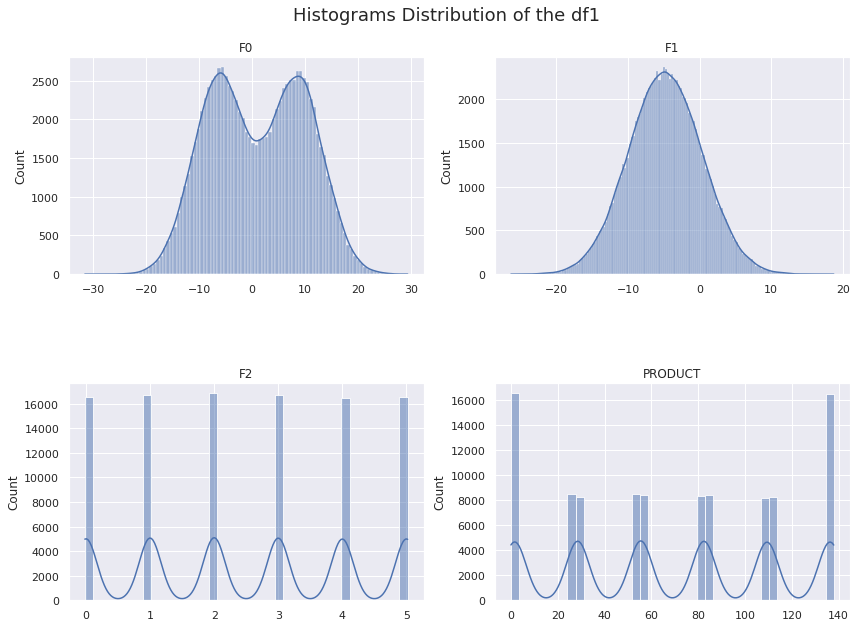

In [13]:
# menampilkan visualisasi df1
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df1', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df1[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Kolom `f0` pada dataset df1 memiliki distribusi bimodal, atau memiliki dua *mode*.
- Kolom `f1` pada dataset df1 memiliki distibusi normal.
- Kolom `f2` dan `product` pada dataset df1 memiiliki distribusi abnormal.


### 3.3. Region 2

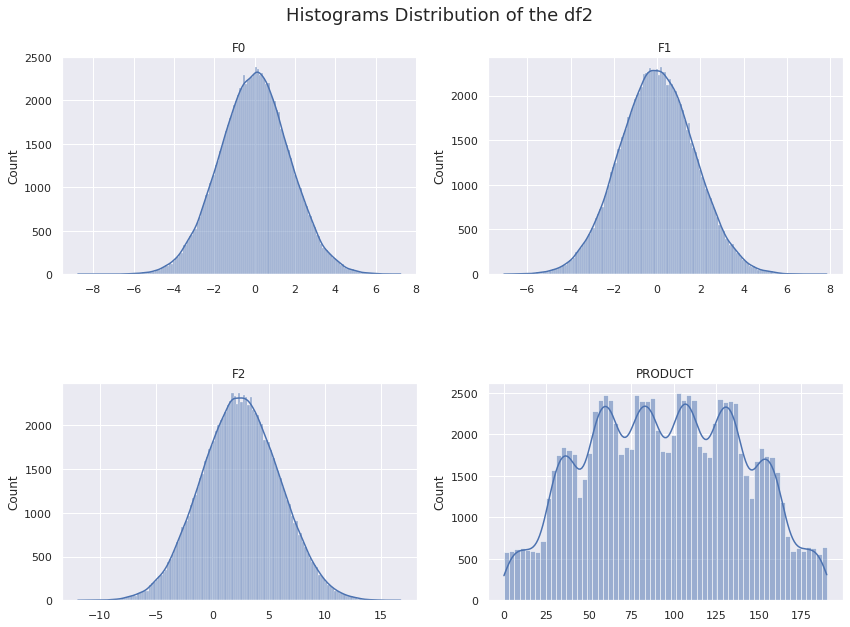

In [14]:
# menampilkan visualisasi df1
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df2', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df2[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Kolom `f0`, `f1`, dan `f2`, memiliki distribusi multimodal.
- Kolom `product` memiliki distribusi normal.

## 4. Split the Data

Kita akan membagi data menjadi dua set yaitu *train set* dan *validation set* dengan rasio **75 : 25**. 

Kita akan melatih dengan model Linear Regression untuk menghitung nilai **RMSE** dan menemukan cadangan sumur minyak baru.

In [15]:
# split the datasets
datasets = [df0, df1, df2]

X_train = []
X_valid = []
y_train = []
y_valid = []

In [16]:
# create for loop function to split data
for data in datasets:
        X = data[data.columns.drop(['id', 'product'])]
        y = data['product']
        features_train, features_valid, target_train, target_valid = train_test_split(X, y, test_size = 0.25, 
                                                              random_state=42)
        X_train.append(features_train)
        X_valid.append(features_valid)
        
        y_train.append(target_train)
        y_valid.append(target_valid)

In [17]:
# display the X_train sample
for region in range(len(datasets)):
    display(X_train[region])

,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607
...,...,...,...
6265,1.626462,-0.107752,2.951064
54886,1.682364,-0.193385,-1.175390
76820,0.979059,-0.550693,2.897510
860,0.652792,-0.484070,7.155391


,f0,f1,f2
98980,9.296378,-4.480220,1.999544
69824,15.836796,1.952969,4.989288
9928,-1.594937,-0.407367,3.003358
75599,12.335752,-6.508978,2.001396
95621,-4.954638,-8.026328,1.001472
...,...,...,...
6265,-9.097344,-9.935211,0.996925
54886,2.490913,-3.577409,4.003892
76820,11.419499,3.616041,0.998035
860,-2.206408,-6.205406,0.008217


,f0,f1,f2
98980,-0.592927,-2.323059,5.344840
69824,-0.690844,1.715501,-1.331142
9928,1.741680,-1.604639,0.499745
75599,-1.354850,0.984588,5.683113
95621,1.075114,1.175117,1.010025
...,...,...,...
6265,-1.842672,-0.003145,0.926830
54886,0.079216,1.076507,3.761491
76820,-2.285696,1.500897,-1.051454
860,-1.446403,-2.164471,3.334692


In [18]:
# display the y_valid sample
for region in range(len(datasets)):
    display(y_valid[region])

75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: product, Length: 25000, dtype: float64

75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
            ...    
21271    107.813044
34014     53.906522
81355     26.953261
65720    110.992147
11627    134.766305
Name: product, Length: 25000, dtype: float64

75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
            ...    
21271     40.797226
34014     87.144239
81355     52.039812
65720    136.961454
11627    109.173206
Name: product, Length: 25000, dtype: float64

## 5. Create Model

### 5.1. Linear Regression

In [19]:
# create RMSE function
def rmse_score(x, y):
    square_root = sqrt(mean_squared_error(x, y))
    return square_root

In [20]:
# create linear regression model function
lr_results = defaultdict(list)

predictions_valid = [] # for profit calculation

for region in range(len(datasets)):
    model = LinearRegression()
    model.fit(X_train[region], y_train[region])

    y_pred_train = model.predict(X_train[region])
    y_pred_valid = model.predict(X_valid[region])
    
    predictions_valid.append(pd.Series(y_pred_valid))

    lr_results['region'].append(region)
    lr_results['rmse_train'].append(rmse_score(y_train[region], y_pred_train))
    lr_results['rmse_valid'].append(rmse_score(y_valid[region], y_pred_valid))
    lr_results['avg_train'].append(y_train[region].mean())
    lr_results['avg_valid'].append(y_valid[region].mean()) 

In [21]:
# print the result of linear regression model
lr_results = pd.DataFrame(lr_results)
lr_results

,region,rmse_train,rmse_valid,avg_train,avg_valid
0,0,37.670499,37.756600,92.558015,92.325956
1,1,0.890420,0.890280,68.858206,68.725381
2,2,40.025181,40.145872,94.949667,95.150999


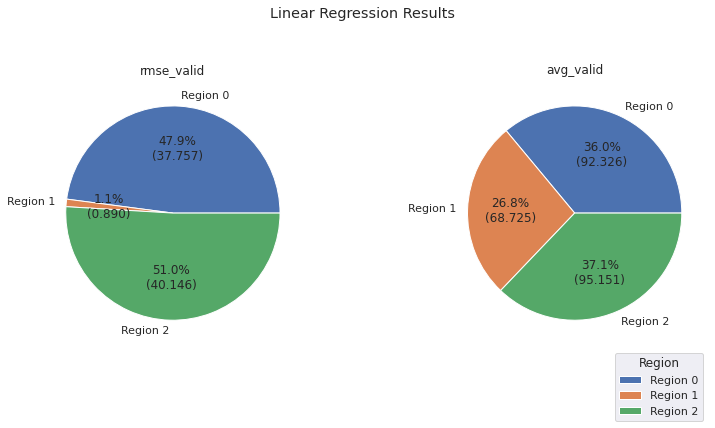

In [22]:
# create pie chart to show the results
palette_color = sns.color_palette('pastel')[0:5]
label = ['Region 0', 'Region 1', 'Region 2']

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2);
plt.subplots_adjust(wspace=0.5)

ax[0].pie(lr_results['rmse_valid'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(lr_results["rmse_valid"]):,.3f})')
ax[0].set_title('rmse_valid')
ax[1].pie(lr_results['avg_valid'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(lr_results["avg_valid"]):,.3f})')
ax[1].set_title('avg_valid')

plt.legend(loc='best', bbox_to_anchor=(1,0), title='Region')
plt.suptitle('Linear Regression Results')
plt.show()

**Temuan:**
- Kita bisa melihat bahwa nilai **RMSE** dari *train set* dan *validation set* memiliki *score* yang mirip, artinya tidak terjadi *underfiting* maupun *overfitting* pada kedua data tersebut.
- Kita dapat mempertimbangkan **region 2** untuk melakukan pengembangan karena memiliki nilai rata-rata cadangan tertinggi sebesar **95.150999**, tetapi perlu diingat bahwa wilayah tersebut juga memiliki **error** yang paling tinggi sebesar **40.145872**.

Kita perlu melakukan analisa lebih lanjut untuk dapat menentukan probabilitas profit maupun kerugian yang dapat terjadi. 

## 6. Caclulate the Profit

In [23]:
# counting the number of products to gain 0 profit

budget = 100000000 # anggaran
wells_to_dig = 200 # jumlah sumur untuk digali

cost_per_well = budget / wells_to_dig # biaya menggali satu sumur
points_per_budget = budget // cost_per_well # point per budget

product_price = 4500 # harga per produk = 1000 barrels

cost_per_point = budget / points_per_budget # biaya per point
zero_profit_product = cost_per_point / product_price # produk dibutuhkan untuk menghasilkan 0 profit

print('Jumlah produk yang dibutuhkan untuk menghasilkan profit $0 =', zero_profit_product)

Jumlah produk yang dibutuhkan untuk menghasilkan profit $0 = 111.11111111111111


**Temuan:**
- Produk yang dibutuhkan untuk untuk mendapatkan *Return of Investment* adalah sebanyak **111** produk atau **111.000** *barrels*.
- Pada analisa sebelumnya kita mendapatkan bahwa **Region 2** memiliki rata-rata cadangan minyak tertinggi dengan **95** produk yang bisa dihasilkan, tetapi jumlah tersebut masih jauh untuk mencukupi kebutuhan dalam menghasilkan profit **0**.

In [24]:
# create fuction to calculate the profit7

def profit(target, predictions):
    predictions_sorted = predictions.reset_index(drop=True).sort_values(ascending=False) # hasil prediksi jumlah produk validation set
    selected_points = target.reset_index(drop=True).iloc[predictions_sorted.index][:200] # jumlah produk validation set
    product = selected_points.sum() # jumlah produk dalam validation set
    revenue = product * product_price # pendapatan = produk × harga produk
    cost = budget
    
    return revenue - cost # pendapatan - biaya

In [25]:
# calculate the profit without bootstrapping
profit_outcome = defaultdict(list)

for region in range(len(datasets)):
    profit_outcome['region'].append(region)
    profit_outcome['profit'].append(profit(y_valid[region], predictions_valid[region]))

pd.set_option('display.float_format',  '{:,f}'.format)
pd.DataFrame(profit_outcome)

,region,profit
0,0,"33,591,411.144622"
1,1,"24,150,866.966815"
2,2,"25,985,717.593741"


**Temuan:**
- Tanpa **bootstrapping** laba tertinggi diperoleh pada **Region 0**.

In [26]:
# create boostrap function to calculet the profit

state = np.random.RandomState(42)
profit_boost = defaultdict(list)

for region in range(3):
    target = y_valid[region]
    predictions = predictions_valid[region]
    
    profit_values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        predicted_valid_subsample = pd.Series(predictions).iloc[target_subsample.index]
        profit_values.append(profit(target_subsample, predicted_valid_subsample))
    profit_values = pd.Series(profit_values)
        
    mean_profit = profit_values.mean()
    lower_quantile = profit_values.quantile(0.025)
    upper_quantile = profit_values.quantile(0.975)
    negative_profit_chance = (profit_values < 0).mean() * 100 
  
    profit_boost['region'].append(region)
    profit_boost['avg_profit'].append(mean_profit)
    profit_boost['lower_quantile'].append(lower_quantile)
    profit_boost['upper_quantile'].append(upper_quantile)
    profit_boost['risk_of_losses'].append(negative_profit_chance)

In [27]:
# show the profit and risk of losses results
pd.set_option('display.float_format',  '{:,.2f}'.format)
profit_boost = pd.DataFrame(profit_boost)
profit_boost

,region,avg_profit,lower_quantile,upper_quantile,risk_of_losses
0,0,"3,995,754.78","-1,104,678.95","8,974,603.28",6.00
1,1,"4,525,765.94","523,094.10","8,301,463.13",0.90
2,2,"3,787,059.04","-1,277,794.35","9,079,234.83",7.50


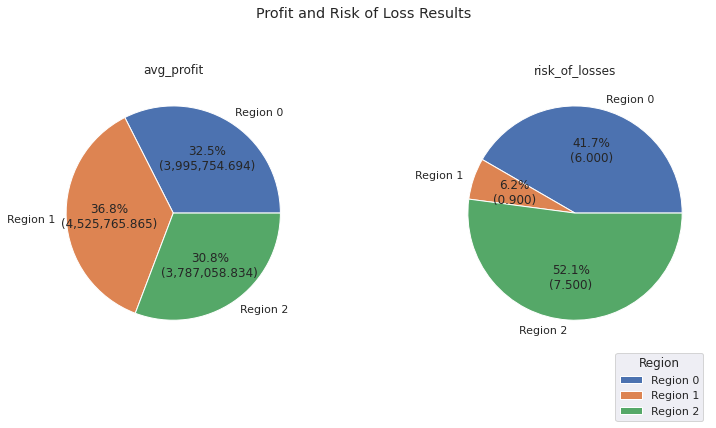

In [28]:
# create pie chart to show the profit results
palette_color = sns.color_palette('pastel')[0:5]
label = ['Region 0', 'Region 1', 'Region 2']

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2);
plt.subplots_adjust(wspace=0.5)

ax[0].pie(profit_boost['avg_profit'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profit_boost["avg_profit"]):,.3f})')
ax[0].set_title('avg_profit')
ax[1].pie(profit_boost['risk_of_losses'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profit_boost["risk_of_losses"]):,.3f})')
ax[1].set_title('risk_of_losses')

plt.legend(loc='best', bbox_to_anchor=(1,0), title='Region')
plt.suptitle('Profit and Risk of Loss Results')
plt.show()

**Temuan:**
- Hasil dari teknik *boostrapping* yang kita lakukan untuk kita menetapkan nilai untuk subsampel sebesar **1.000** dan nilai *confidence interval* sebesar **0.90%**  untuk menghitung rata-rata profit, *confidence interval* dan *risk of losses*, didapatkan wilayah terbaik untuk lokasi pembangunan sumur baru pada **Region 2**. 
- Pada wilayah tersebut didapatkan rata-rata profit tertinggi sebesar **4.525.765**, resiko kerugian terendah dengan **0.90%** dan dibawah nilai ambang batas yang ditentukan sebesar **2.5%**.
- Wilayah tersebut juga memiliki rentang *confidence interval* paling rendah dengan tidak ada nilai minus pada *lower quantile*-nya antara **523.094** sampai **8.301.463** untuk *upper quantile*.

# Consclusions

**1. Data Preparation**
- Kita memulai dengan memuat 3 dataset yang masing-masing terdiri dari **5** kolom dan **100.000** baris.
- Tidak ada *missing value* ditemukan pada ketiga dataset tersebut, tipe data data pada kolom-kolom sudah terdefinisi dengan benar, kolom `id` dedefinisikan sebagai **object** sedangkan kolom `f0`, `f1`, `f2`, dan `product` didefinisikan sebagai **float**.
- Pada **Region 2** kolom `f0`, `f1`, dan `f2`, memiliki distribusi multimodal, kolom `product` memiliki distribusi normal.

**2. EDA and Data Visualization**
- Pada **Region 0** kolom `f0`, `f1`, dan `product` memiliki bentuk multimodal, artinya kolom-kolom tersebut memiliki 2 atau lebih *mode*, kolom `f2` memiliki distribusi normal..
- Pada **Region 1** kolom `f0` pada dataset df1 memiliki distribusi bimodal, kolom `f1` pada dataset df1 memiliki distibusi normal, kolom `f2` dan `product` pada dataset df1 memiiliki distibusi abnormal.

**3. Split the Data**
- Kita akan membagi data menjadi dua set yaitu *train set* dan *validation set* dengan rasio **75 : 25**. 
- Kita menggunakan kolom `f0`, `f1`, dan `f2` sebagai *features set* dan kolom `product` sebagai *target set*, kita juga melakukan drop pada kolom `id` yang tidak diperlukan untuk membuat model.

**4. Model**
- Kita bisa mendapatkan hasil nilai **RMSE** dari *train set* dan *validation set* memiliki *score* yang mirip, artinya tidak terjadi *underfiting* maupun *overfitting* pada kedua data tersebut.
- Kita akan mempertimbangkan **region 2** untuk melakukan pengembangan karena memiliki nilai rata-rata cadangan tertinggi, tetapi perlu diingat bahwa wilayah tersebut juga memiliki **error** yang paling tinggi.

**5. Calculate the Profit**
- Hasil dari teknik *boostrapping* yang kita lakukan untuk menghitung rata-rata profit, *confidence interval* dan *risk of losses*, didapatkan wilayah terbaik untuk lokasi pembangunan sumur baru pada **Region 2**. 
- Pada wilayah tersebut didapatkan rata-rata profit tertinggi sebesar **4.525.765**, resiko kerugian terendah dengan **0.90%** dan dibawah nilai ambang batas yang ditentukan.
- Wilayah tersebut juga memiliki rentang *confidence interval* paling rendah dengan tidak ada nilai minus pada *lower quantile*-nya.


**Main Consclusion**

Kita menemukan wilyah terbaik untuk melakukan pengembangan sumur baru pada **Region 1**. Pada wilayah ini kita mendapatkan hasil rata-rata profit tertinggi dan resiko kerugian paling kecil.